### Codio Activity 10.5: ACF and PACF Plots for ARMA Models

This assignment focuses on using the autocorrelation and partial autocorrelation plots to determine parameters for stationary data.  In general, you will first determine the stationarity of a time series using the Dickey Fuller test (or eyeballing it) and then examine the autocorrelation and partial autocorrelation to identify the parameters for each term.

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import warnings

In [2]:
warnings.filterwarnings('ignore')

### The Data

Two datasets are used to examine stationarity and autoregression and moving average components for ARMA models.  The first is the recruits data, encountered earlier.  The second is a series of Quarterly GNP data from the United States from 1947 through 2002. In the first you predict the number of recruits and the second your target is the difference of the logarithm of the GNP. 

In [4]:
recruits = pd.read_csv('codio_10_5_solution/data/recruitment.csv', index_col=0)

In [5]:
recruits.head()

,value
1950-01-01,68.63
1950-02-01,68.63
1950-03-01,68.63
1950-04-01,68.63
1950-05-01,68.63


In [11]:
recruits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 1950-01-01 to 1987-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   453 non-null    float64
dtypes: float64(1)
memory usage: 7.1+ KB


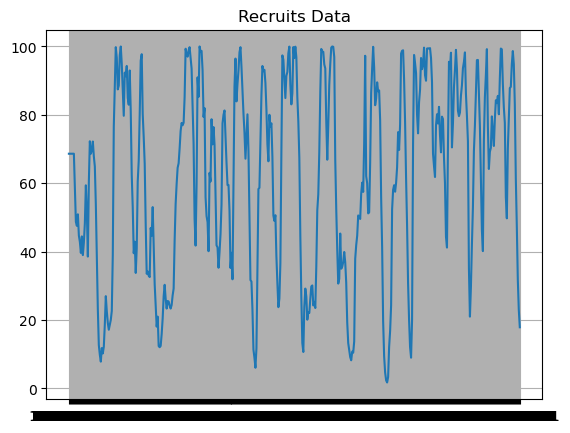

In [7]:
plt.plot(recruits['value'])
plt.title('Recruits Data')
plt.grid()

### Problem 1

#### Is it Stationary? 

As discussed, our ARMA models are only applicable for stationary data.  Use the `adfuller` function to determine if the recruits data is stationary at the 0.05 level.  Assign your answer as a string to `ans1` below. 

In [8]:
results = adfuller(recruits)
results

(np.float64(-6.239970407069512),
 np.float64(4.7233812728107004e-08),
 12,
 440,
 {'1%': np.float64(-3.445299682487321),
  '5%': np.float64(-2.8681312035123967),
  '10%': np.float64(-2.570280872933884)},
 np.float64(3193.5098343134127))

In [9]:
ans1 = 'yes'

### Problem 2

#### Building train and test set

Now, we use the familiar `train_test_split` and set `shuffle = False` to create a temporal train and test set.  Leave all arguments to default except `shuffle`.  Assign your results as `y_hist` and `y_future` below. 

In [10]:
y_hist,y_future = train_test_split(recruits, shuffle = False)
y_hist

,value
1950-01-01,68.63000
1950-02-01,68.63000
1950-03-01,68.63000
1950-04-01,68.63000
1950-05-01,68.63000
...,...
1977-11-01,98.74000
1977-12-01,98.88000
1978-01-01,90.41001
1978-02-01,77.86000


### Problem 3

#### Examining acf and pacf

Below, the ACF and PACF plots are shown.  While the ACF plot isn't incredibly helpful, the PACF may suggest using a value of `p = 1` in an ARMA model.  As such, create and fit an ARIMA model with `p = 1` and `q = 1`.  Assign your fit model as `arma` below.

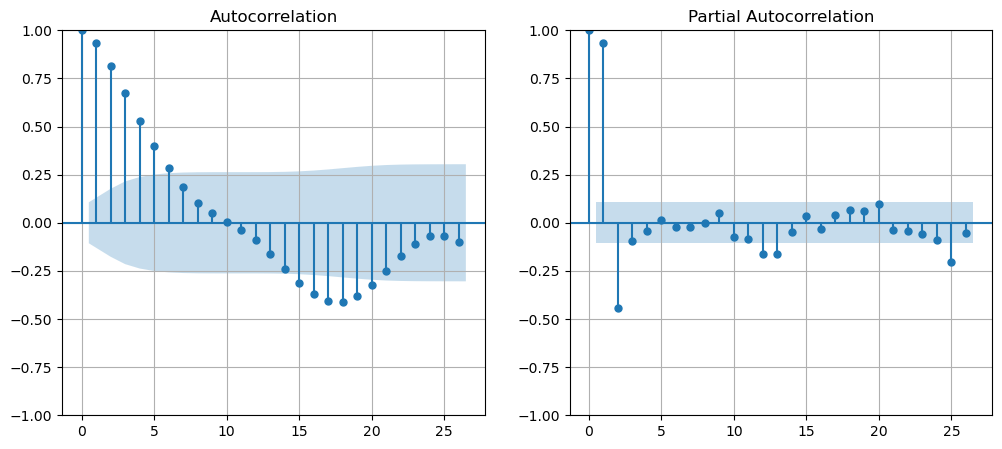

In [19]:
fig,ax = plt.subplots(1,2,figsize = (12,5))
plot_acf(y_hist, ax = ax[0])
ax[0].grid()
plot_pacf(y_hist, ax = ax[1], method = 'ywm')
ax[1].grid()

In [20]:
y_hist.index = pd.to_datetime(y_hist.index)

In [22]:
y_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 339 entries, 1950-01-01 to 1978-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   339 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [23]:
arma = ARIMA(y_hist['value'], order = (1,0,1)).fit()

In [24]:
arma

### Problem 4

#### Making Predictions

Use the `arma` object to make predictions for the training data.  Assign these results as `hist_preds` below.  Uncomment the code to view a plot of the results against the original series. 

In [25]:
hist_preds = arma.predict()
hist_preds

1950-01-01     58.053029
1950-02-01     67.943160
1950-03-01     67.730297
1950-04-01     67.832533
1950-05-01     67.798872
                 ...    
1977-11-01    100.628693
1977-12-01     93.700356
1978-01-01     96.456426
1978-02-01     84.710623
1978-03-01     73.198915
Freq: MS, Name: predicted_mean, Length: 339, dtype: float64

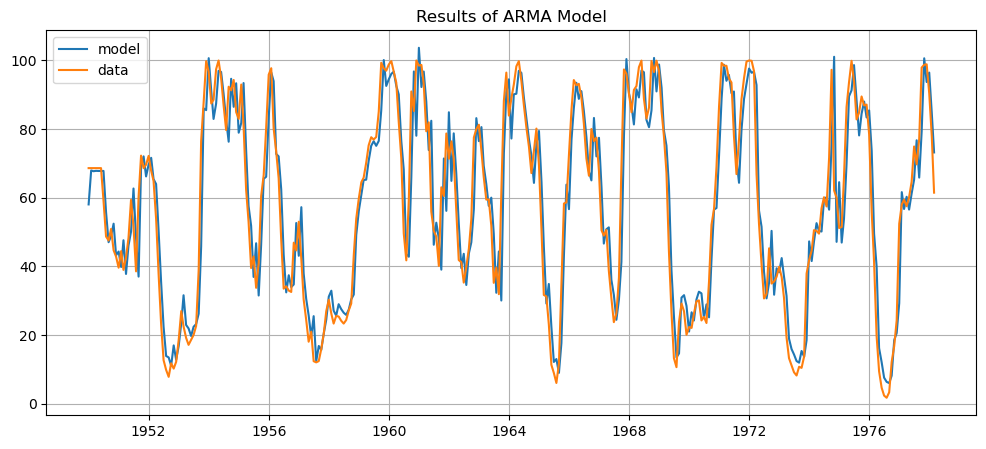

In [32]:
plt.figure(figsize = (12,5))
plt.plot(hist_preds, label = 'model')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.title("Results of ARMA Model")
plt.grid()

### Problem 5

#### Forecasting with the ARMA model

Finally, to use the forecasting capabilities of the model, pass the number of steps to forecast in the future.  Assign the forecast into the future to match up with `y_future` values as `future_preds` below.  

In [33]:
y_future.index = pd.to_datetime(y_future.index)

In [37]:
future_preds = arma.forecast(steps = len(y_future))
future_preds

1978-04-01    56.752694
1978-05-01    56.891291
1978-06-01    57.015115
1978-07-01    57.125741
1978-08-01    57.224576
                ...    
1987-05-01    58.053023
1987-06-01    58.053024
1987-07-01    58.053024
1987-08-01    58.053025
1987-09-01    58.053025
Freq: MS, Name: predicted_mean, Length: 114, dtype: float64

In [36]:
print(future_preds.tail())
print(y_future.tail())

1987-05-01    58.053023
1987-06-01    58.053024
1987-07-01    58.053024
1987-08-01    58.053025
1987-09-01    58.053025
Freq: MS, Name: predicted_mean, dtype: float64
            value
1987-05-01  61.42
1987-06-01  47.47
1987-07-01  31.81
1987-08-01  22.95
1987-09-01  17.87


### Problem 6

#### The GNP series

Below, the `gnp` data is loaded and displayed.  This data is transformed according to the first difference of the logarithm so as to form a stationary series.  Then, the ACF and PACF plots are shown on the stationary series.  These suggest that an AR(2) and MA(2) model might be appropriate.  Build an `ARIMA` model on `y` and predict as `preds`.  Uncomment the code to visualize the predictions.

In [39]:
gnp = pd.read_csv('codio_10_5_solution/data/gnp.csv', index_col=0)
gnp.index = pd.Index(pd.date_range("1947-Q1", "2002-Q4", freq = "Q"))
gnp.head()

,value
1947-03-31,1488.9
1947-06-30,1496.9
1947-09-30,1500.5
1947-12-31,1524.3
1948-03-31,1546.6


<Axes: >

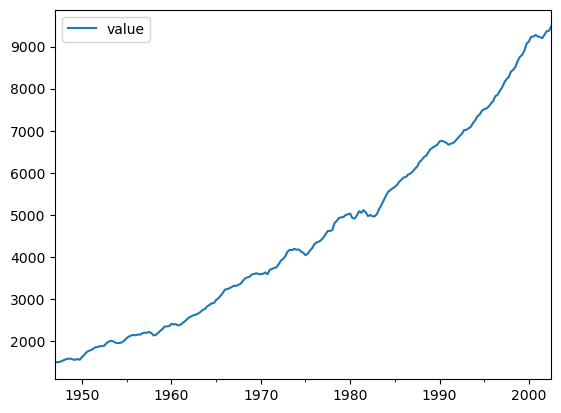

In [40]:
gnp.plot()

In [41]:
y = np.log(gnp).diff().dropna()

In [42]:
y

,value
1947-06-30,0.005359
1947-09-30,0.002402
1947-12-31,0.015737
1948-03-31,0.014524
1948-06-30,0.015717
...,...
2001-09-30,-0.002660
2001-12-31,0.009057
2002-03-31,0.009008
2002-06-30,0.000982


In [43]:
#note the stationarity
adfuller(y)

(np.float64(-10.291967758822777),
 np.float64(3.550732270832685e-18),
 0,
 221,
 {'1%': np.float64(-3.4602906385073884),
  '5%': np.float64(-2.874708679520702),
  '10%': np.float64(-2.573788599127782)},
 np.float64(-1350.8710047523716))

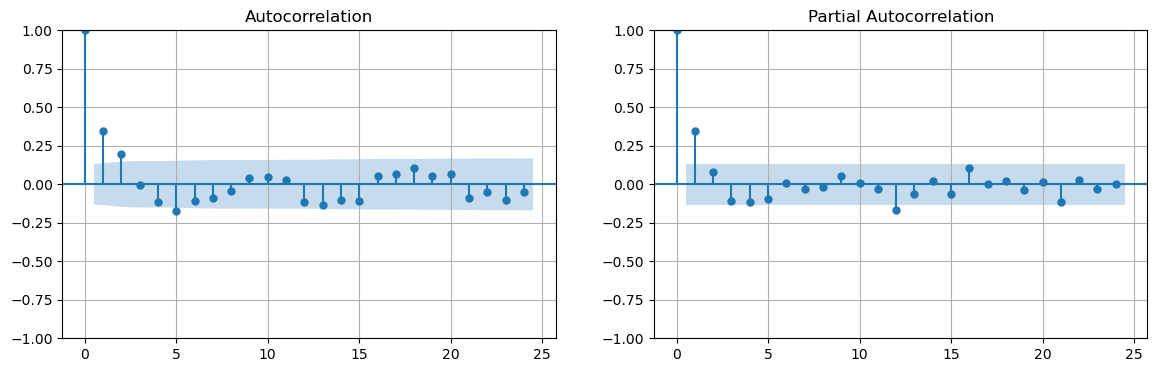

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
plot_acf(y, ax = ax[0]);
ax[0].grid()
plot_pacf(y, ax = ax[1])
ax[1].grid();

In [45]:
arma2 = ARIMA(y, order = (2, 0, 2)).fit()
preds = arma2.predict()

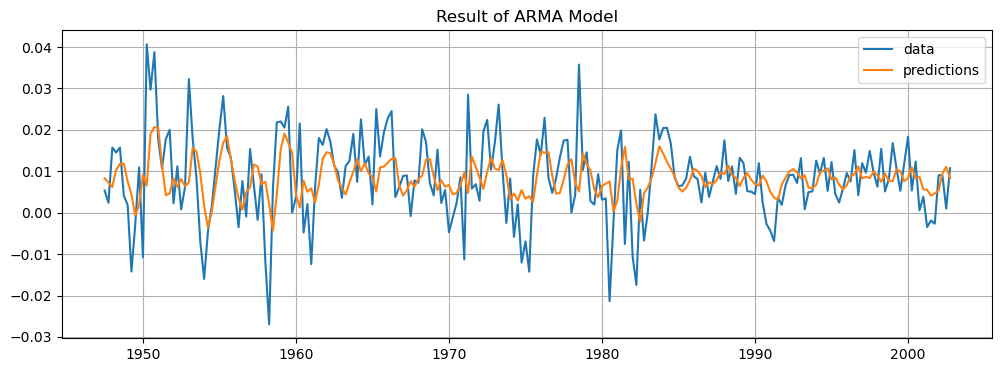

In [46]:
plt.figure(figsize = (12, 4))
plt.plot(y, label = 'data')
plt.plot(preds, label = 'predictions')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

### Problem 7

#### Errors and Autocorrelation

Below, subtract the predictions from the actual series.  Determine the stationarity of the results by examining the autocorrelation plot of the residuals.  Is there structure remaining in the series based on this?  Assign your answer as a string to `ans7` below -- 'yes' or 'no'.

In [47]:
preds = pd.DataFrame(preds)
preds.columns = ['value']

In [48]:
resids = y - preds
ans7 = 'no'

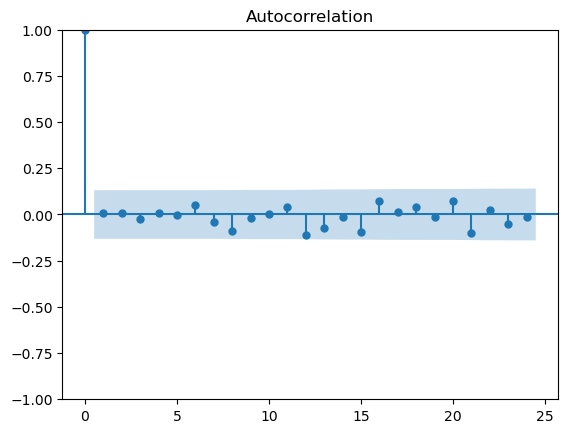

In [49]:
plot_acf(resids);

### Codio Activity 10.6: Time Series and Sales

This activity is meant to extend your work with ARMA models to apply a forecasting model across stores in a retail chain, and items in each store.  You will build models for each store for a specific item and compare this forecast to the model aggregating all stores.  Also, you will compare a model for sales by store for all items and discuss expected performance for each store according to your forecast.  

In addition to the ARMA models, you will explore an extension of this to include seasonality elements with the SARIMA model.  These are both implemented with `statsmodels`.   

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)

In [50]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error


### The Data

The data is from a past time series competition on kaggle [here](https://www.kaggle.com/c/demand-forecasting-kernels-only).  It represents historical sales across 10 stores of 50 items.  Each observation is a days total sales by store and item.  

In [52]:
df = pd.read_csv('codio_10_6_solution/data/train.csv.zip', compression = 'zip')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [54]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


### Problem 1

#### Structuring the data and time series

To begin, notice that the DataFrame `df` does not have a datetime index.  Below, convert the `date` column to a datetime object and set it as the index to a new DataFrame called `stores_df` below.

In [58]:
stores_df = df.set_index(pd.to_datetime(df['date'])).drop('date', axis = 1)
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB


In [60]:
stores_df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


### Problem 2

#### Store 1 Model

In anticipation of building a 30 day forecast for sales of item 1 in store 1, subset the data to only the sales column for item 1 store 1 and assign as a DataFrame to `store_1_item_1` below. 

In [61]:
store_1_item_1 = stores_df[(stores_df['store'] == 1) & (stores_df['item'] == 1)][['sales']]

In [62]:
store_1_item_1.head()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


### Problem 3

#### Train/Test split

Now, use the store 1 data from the previous question to create a train-test split where `train_data` is all but the last 30 days of sales data.  You no longer need the store and item columns.  Assign these values as `X_train` and `X_test` respectively.

In [63]:
X_train, X_test = store_1_item_1.iloc[:-30], store_1_item_1.iloc[-30:]
X_train

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10
...,...
2017-11-27,10
2017-11-28,14
2017-11-29,28


### Problem 4

#### Assumptions of Linearity

Next, you will want to check the assumptions of our model before building it.  Specifically, this was the notion that our time series is stationary for the ARMA models.  Use the `adfuller` function to determine if the series is stationary.  Assign the $p$ value to `pval` below.  Consider your threshold at $p = 0.01$.  

In [64]:
pval = adfuller(X_train)[1]

In [65]:
print(f'The p-value is {pval: .4f}')

The p-value is  0.0266


### Problem 5

#### Autocorrelation and Partial Autocorrelation

Backing up the results of our hypothesis test, the autocorrelation of the original series seems to not be stationary.  Instead, the differenced data and its ACF and PACF plot look better.  We will begin by using these plots to suggest an `order = (1, 0, 1)` model based on the differenced data.  Accordingly, build an `ARIMA` model with `order = (1, 0, 1)` and fit on the training data and assign to `arma` below.

Determine the mean squared error on the test data and assign as a float to `mse_test` below.  


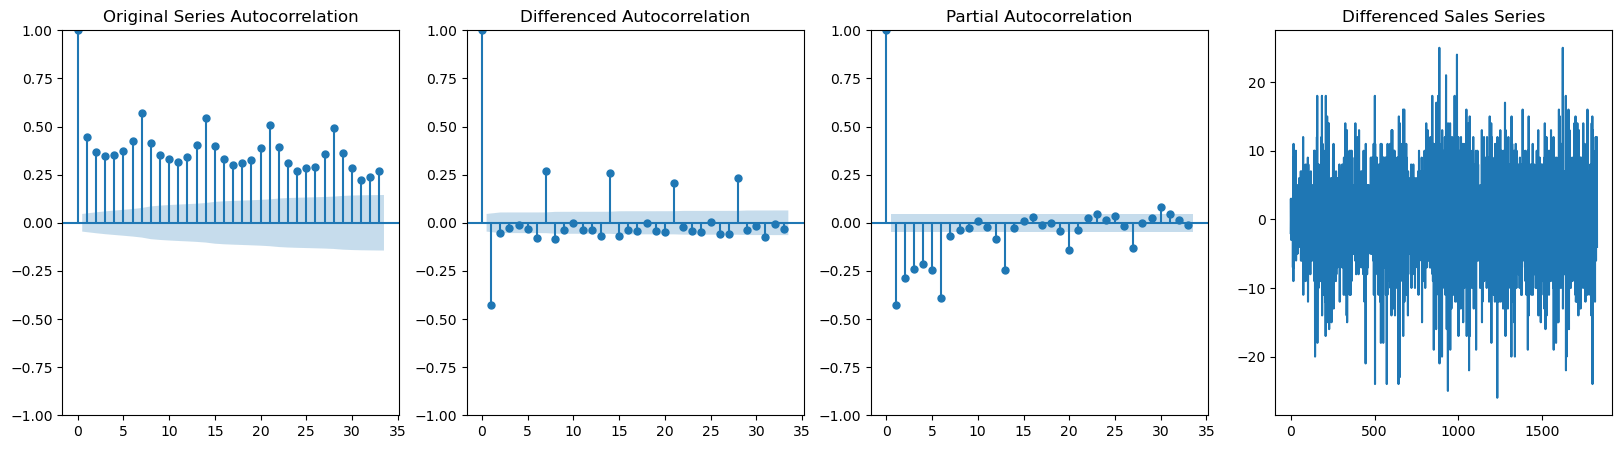

In [66]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plot_acf(df[(df['store'] == 1) & (df['item'] == 1)]['sales'], ax = ax[0]);
ax[0].set_title('Original Series Autocorrelation')
plot_acf(df[(df['store'] == 1) & (df['item'] == 1)]['sales'].diff().dropna(), ax = ax[1]);
ax[1].set_title('Differenced Autocorrelation')
plot_pacf(df[(df['store'] == 1) & (df['item'] == 1)]['sales'].diff().dropna(), ax = ax[2], method = 'ywm');
ax[3].plot(df[(df['store'] == 1) & (df['item'] == 1)]['sales'].diff().dropna())
ax[3].set_title('Differenced Sales Series');

In [67]:
arma = ARIMA(X_train.diff(), order = (1, 0, 1), freq = 'D').fit()
preds = arma.forecast(len(X_test))
mse_test = mean_squared_error(preds, X_test)

In [68]:
print(preds[:5])
print(mse_test)

2017-12-02    2.767694
2017-12-03    0.216277
2017-12-04    0.022110
2017-12-05    0.007334
2017-12-06    0.006209
Freq: D, Name: predicted_mean, dtype: float64
320.39147462165994


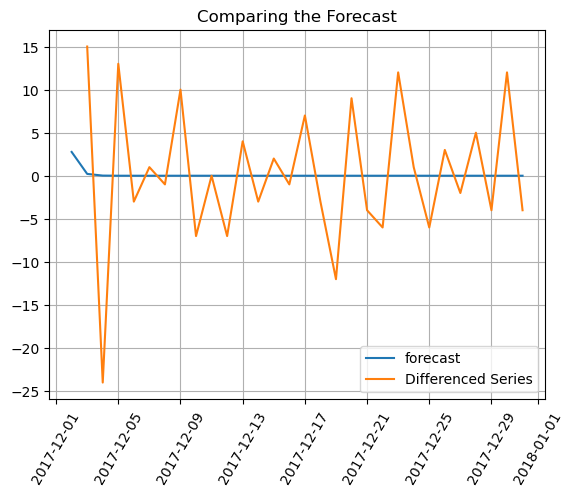

In [69]:
plt.plot(arma.forecast(steps = len(X_test)), label = 'forecast')
plt.plot(X_test.diff(), label = 'Differenced Series')
plt.title('Comparing the Forecast')
plt.legend();
plt.xticks(rotation = 60)
plt.grid();

### Problem 6

#### A Model with Seasonality

As discussed with the decomposition models earlier, there are ways to consider a seasonal oscillation within the data.  For ARIMA, a version that adds in a seasonal element is called SARIMA.  In statsmodels, we use the `SARIMAX` estimator to build this model that includes seasonal elements.

Much like the decomposition model, you can have a multiplicative or additive seasonality.  For a multiplicative seasonal effect that we determine is yearly we add an argument

```
seasonal_order=(1, 1, 0, 12)
```

along with the `order = (1, 0, 1)`.  For more information see the user guide from statsmodels [here](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html).

Below, build a `SARIMAX` estimator with the above order and seasonality and fit on the training data.  Assign the fit model to `sarima` below.

In [70]:
stores_df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [71]:
X_train, X_test = stores_df['sales'].iloc[-700:-30], stores_df.iloc[-30:]

In [72]:
sarima = SARIMAX(X_train,  order=(1, 0, 1), seasonal_order=(1, 1, 0, 12)).fit(disp=0)

In [73]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               sales   No. Observations:                  670
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood               -2863.003
Date:                             Sat, 09 Aug 2025   AIC                           5734.007
Time:                                     23:02:54   BIC                           5751.964
Sample:                                 02-01-2016   HQIC                          5740.968
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1281      0.167      0.769      0.442      -0.198       0.455
ma.L1          0.1222      0.172      0.712      0.476      -0.214       0.459
ar.S.L12      -0.4116      0.037    -10.992      0.000      -0.485      -0.338
sigma2       350.9937     19.375     18.116      0.000     313.020     388.967
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.53
Prob(Q):                              0.96   Prob(JB):                         0.06
Heteroskedasticity (H):               1.28   Skew:                             0.22
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

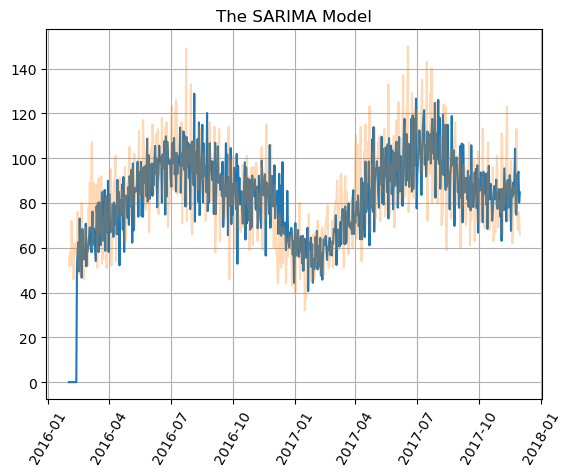

In [74]:
plt.plot(X_train.index, sarima.predict())
plt.plot(X_train.index, X_train, alpha = 0.3)
plt.xticks(rotation = 60)
plt.title('The SARIMA Model')
plt.grid();

As you see, the SARIMA model can pick up the seasonal trends we have in this dataset.  You can also get a more sensitive ARMA model by using higher order terms.  If you are interested in further work here, try grid searching order and seasonality hyperparameters to determine the best model and order/seasonality parameters. 

Also, you can incorporate other features about the data as exogenous elements of both the ARMA and SARIMA models in statsmodels.  Consider trying engineering features with `ts_fresh` and using an exogenous model to see if this improves performance.